In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

df = pd.read_csv("/content/Heart.csv", index_col=0)

train, test = train_test_split(df ,test_size=0.3 ,random_state=123)

train = train.dropna()

X_train = train[["Age","Sex","Chol"]] #Metemos todas las variables excepto AHD
y_train = (train["AHD"]=="Yes").astype("int") #Lo que se quiere predecir

In [ ]:
X_train = X_train.dropna()

In [ ]:
model = DecisionTreeClassifier(max_depth=3)
#Cuando se cambia el argumento va cambiando los datos, buscamos que ambos resultados sean parecidos.
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=3)

In [ ]:
model.predict([[21,0,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([0])

In [ ]:
model.predict_proba([[50,0,80]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[1., 0.]])

In [ ]:
X_train

,Age,Sex,Chol
171,70,1,269
133,29,1,204
137,70,1,174
287,58,0,225
152,42,0,265
...,...,...,...
107,59,1,177
84,68,1,274
18,54,1,239
231,52,0,196


In [ ]:
X_test = test[["Age","Sex","Chol"]]
y_test = (test["AHD"]=="Yes").astype("int")

In [ ]:
y_test

12     0
293    1
270    0
269    1
95     0
      ..
263    0
8      0
163    0
264    0
232    1
Name: AHD, Length: 91, dtype: int64

In [ ]:
model.predict([[56,0,294]])

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([1])

In [ ]:
#Porcetaje de aciertos de el modelo
from sklearn.metrics import accuracy_score

#A VECES ESTE MODELO DA MAL AUN CON LOS DATOS CON LOS QUE SE ENTRENO, ESTO QUIERE DECIR QUE NO SE PUEDE PREDECIR
accuracy_score(y_train, model.predict(X_train)) * 100

accuracy_score(y_test, model.predict(X_test)) * 100

#Cuando supera la referencia que se tiene, el modelo esta bien (Ej: Si nuestro modelo se equivoca menos dque un medico)

60.43956043956044

[Text(0.5769230769230769, 0.875, 'Age <= 54.5\ngini = 0.499\nsamples = 207\nvalue = [109, 98]'),
 Text(0.3076923076923077, 0.625, 'Sex <= 0.5\ngini = 0.43\nsamples = 99\nvalue = [68, 31]'),
 Text(0.15384615384615385, 0.375, 'Chol <= 304.5\ngini = 0.128\nsamples = 29\nvalue = [27, 2]'),
 Text(0.07692307692307693, 0.125, 'gini = 0.0\nsamples = 26\nvalue = [26, 0]'),
 Text(0.23076923076923078, 0.125, 'gini = 0.444\nsamples = 3\nvalue = [1, 2]'),
 Text(0.46153846153846156, 0.375, 'Chol <= 263.5\ngini = 0.485\nsamples = 70\nvalue = [41, 29]'),
 Text(0.38461538461538464, 0.125, 'gini = 0.452\nsamples = 55\nvalue = [36, 19]'),
 Text(0.5384615384615384, 0.125, 'gini = 0.444\nsamples = 15\nvalue = [5, 10]'),
 Text(0.8461538461538461, 0.625, 'Age <= 70.5\ngini = 0.471\nsamples = 108\nvalue = [41, 67]'),
 Text(0.7692307692307693, 0.375, 'Chol <= 413.0\ngini = 0.462\nsamples = 105\nvalue = [38, 67]'),
 Text(0.6923076923076923, 0.125, 'gini = 0.455\nsamples = 103\nvalue = [36, 67]'),
 Text(0.846153

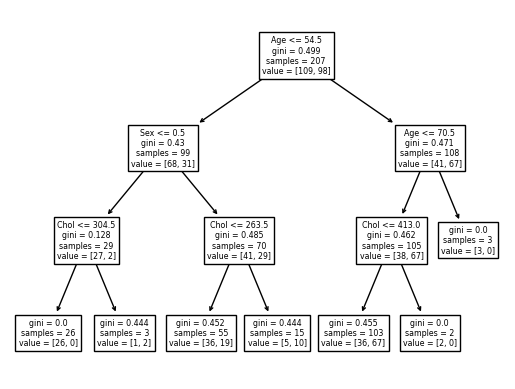

In [ ]:
#Underfiting es que va mal en train
#Overfitting sale bien en train pero mal en test o validacion
from sklearn.tree import plot_tree
plot_tree(model, feature_names=["Age","Sex","Chol"])
#SI hacia la izq en cuanto a las felchitas
#En value se evalua los que tienen ataque al corazon contra los que no, los que tienen a la derecha

In [ ]:
model.predict([[56,0,294]])
model.predict_proba([[56,0,294]])
#La probabilidad que no y la que si
#Para averiguar de donde sale la probablilidad me situo en el nodo del arbol

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


array([[0.34951456, 0.65048544]])

In [ ]:
#Se usan 3 datasets tarin, validacion (Es lo mismo que el test pero si lo podemos repetir) y test (Solo se puede usar una sola vez para que no se aprenda las respuestas)
#Se utilizan los tres de la siguiente manera, primero se utiliza train para asegurarnos que tenemos un buen modelo, posteriormente se usa validacion para ver como se comporta el
#modelo en varios escenarios, luego contraponemos este resultado al de test. El de test solo se hara una vez para comprobar como se va a comportar el modelo sin tener que usarlo
#varias veces.

In [ ]:
#Se hace la validacion cruzada porque tenemos pocos datos, esot es para que el modelo se sepa comportar en cada modulo que vamos a dividir, generalmente se hacen 5 o 10 modulos
#Pero en este caso se toman 3
#Se pueden hacer tres experimentos distintos para probar el modelo con 3 distintos train y validation. Se utiliza un tercio para entrenar el modelo y esto se hace 3 veces, luego
#se promedian los resultados y evaluamos el comportamiento. Ya hay una biblioteca que hace eso entonces es mas fail
from sklearn.model_selection import cross_validate
results = cross_validate(
    DecisionTreeClassifier(max_depth=3),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True
)
results

{'fit_time': array([0.01147676, 0.00486279, 0.00406504]),
 'score_time': array([0.00326657, 0.00287962, 0.00321889]),
 'test_accuracy': array([0.53623188, 0.57971014, 0.60869565]),
 'train_accuracy': array([0.68115942, 0.74637681, 0.65217391])}

In [ ]:
#Se puede acceder a alguno de los tres modelos de la siguiente manera:
from sklearn.model_selection import cross_validate
results = cross_validate(
    DecisionTreeClassifier(max_depth=3),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True,
    return_estimator=True
)
results
#Tarea: Sacar promedios con desviacion std y se dibujan

{'fit_time': array([0.01135731, 0.00414515, 0.0124495 ]),
 'score_time': array([0.00371361, 0.0229075 , 0.02052331]),
 'estimator': [DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3),
  DecisionTreeClassifier(max_depth=3)],
 'test_accuracy': array([0.53623188, 0.57971014, 0.60869565]),
 'train_accuracy': array([0.68115942, 0.74637681, 0.65217391])}

In [ ]:
print(results['test_accuracy'].mean())
print(results['test_accuracy'].std())
print(results['train_accuracy'].mean())
print(results['train_accuracy'].std())

0.5748792270531401
0.029779777792120654
0.6932367149758454
0.03939494306835769


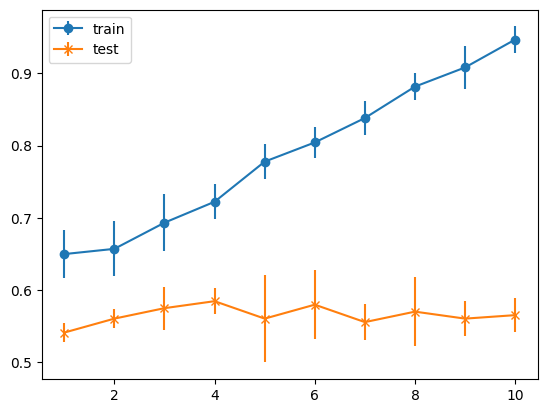

In [ ]:
import matplotlib.pyplot as plt

train_mean_list = list()
train_std_list = list()
test_mean_list = list()
test_std_list = list()

for i in range(10):
  model = DecisionTreeClassifier(max_depth=i+1)
  #Cuando se cambia el argumento va cambiando los datos, buscamos que ambos resultados sean parecidos.
  model.fit(X_train, y_train)
  results = cross_validate(
    DecisionTreeClassifier(max_depth=i+1),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True
  )
  train_mean_list.append(results['train_accuracy'].mean())
  train_std_list.append(results['train_accuracy'].std())
  test_mean_list.append(results['test_accuracy'].mean())
  test_std_list.append(results['test_accuracy'].std())

plt.errorbar(range(1,11),train_mean_list,train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),test_mean_list,test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

#El mejor arbol es 2 puesto que ambas lineas estan cerca para que no haya over o under

In [ ]:
#Se utiliz un nuevo metodo llamado KNN

from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
df = pd.read_csv("/content/Heart.csv", index_col=0)

dfI = df[['Age','Sex','Chol']]
ESC_MIN = MinMaxScaler()
minmax_scaler = ESC_MIN.fit_transform(dfI)

pipeline_numerico =\
   Pipeline(
      [
        ('Escalador', MinMaxScaler()), # Escalar los datos con MinMaxS
      ]
   )

transformer = ColumnTransformer(
  [
      ('Numerico',pipeline_numerico, [0,1,2]),
  ]
)

transformer.fit(dfI)
dfII = transformer.transform(dfI)

dfII

array([[0.70833333, 1.        , 0.24429224],
       [0.79166667, 1.        , 0.3652968 ],
       [0.79166667, 1.        , 0.23515982],
       [0.16666667, 1.        , 0.28310502],
       [0.25      , 0.        , 0.17808219],
       [0.5625    , 1.        , 0.25114155],
       [0.6875    , 0.        , 0.32420091],
       [0.58333333, 0.        , 0.52054795],
       [0.70833333, 1.        , 0.29223744],
       [0.5       , 1.        , 0.17579909],
       [0.58333333, 1.        , 0.15068493],
       [0.5625    , 0.        , 0.38356164],
       [0.5625    , 1.        , 0.29680365],
       [0.3125    , 1.        , 0.31278539],
       [0.47916667, 1.        , 0.16666667],
       [0.58333333, 1.        , 0.09589041],
       [0.39583333, 1.        , 0.23515982],
       [0.52083333, 1.        , 0.25799087],
       [0.39583333, 0.        , 0.34018265],
       [0.41666667, 1.        , 0.3196347 ],
       [0.72916667, 1.        , 0.19406393],
       [0.60416667, 0.        , 0.35844749],
       [0.

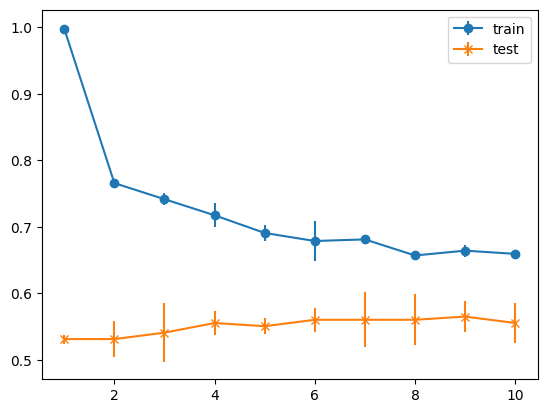

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn_train_mean_list = list()
kn_train_std_list = list()
kn_test_mean_list = list()
kn_test_std_list = list()

for i in range(10):
  model = KNeighborsClassifier(n_neighbors=i+1)
  #Cuando se cambia el argumento va cambiando los datos, buscamos que ambos resultados sean parecidos.
  model.fit(X_train, y_train)
  results = cross_validate(
    KNeighborsClassifier(n_neighbors=i+1),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True
  )
  kn_train_mean_list.append(results['train_accuracy'].mean())
  kn_train_std_list.append(results['train_accuracy'].std())
  kn_test_mean_list.append(results['test_accuracy'].mean())
  kn_test_std_list.append(results['test_accuracy'].std())

plt.errorbar(range(1,11),kn_train_mean_list,kn_train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),kn_test_mean_list,kn_test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

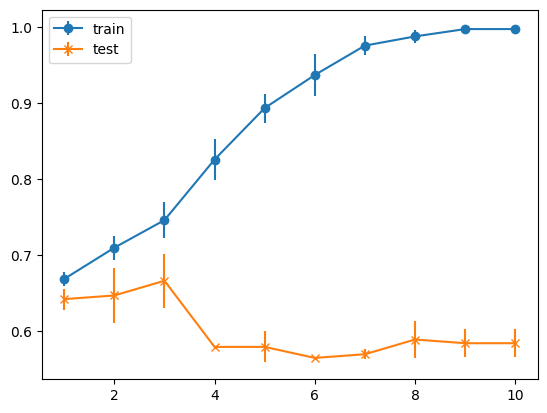

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_train_mean_list = list()
rf_train_std_list = list()
rf_test_mean_list = list()
rf_test_std_list = list()

for i in range(10):
  model = RandomForestClassifier(max_depth=i+1)
  #Cuando se cambia el argumento va cambiando los datos, buscamos que ambos resultados sean parecidos.
  model.fit(X_train, y_train)
  results = cross_validate(
    RandomForestClassifier(max_depth=i+1),
    X_train, y_train, cv=3,
    scoring=["accuracy"],
    return_train_score=True
  )
  rf_train_mean_list.append(results['train_accuracy'].mean())
  rf_train_std_list.append(results['train_accuracy'].std())
  rf_test_mean_list.append(results['test_accuracy'].mean())
  rf_test_std_list.append(results['test_accuracy'].std())

plt.errorbar(range(1,11),rf_train_mean_list,rf_train_std_list, label = "train", marker="o")
plt.errorbar(range(1,11),rf_test_mean_list,rf_test_std_list, label = "test", marker="x")
plt.legend()
plt.show()

#Para poder evaluar los datos dentro de un punto en especifico utilizamos la siguiente linea
results = cross_validate(RandomForestClassifier(1), X_train, y_train, cv=3, scoring=["accuracy"], return_train_score=True, return_estimator=True)

#Esto solo se hace con KNN solo se escala train para tener un resultado lo mas cercano a la realidad posible, se hace unpipline dentro del cross con preprocesamiento ademas del model

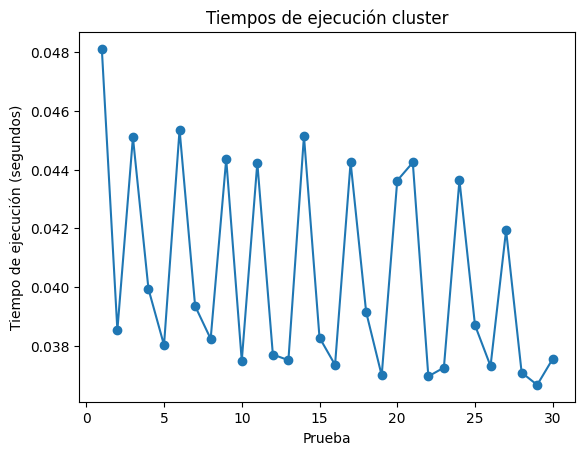

In [13]:
#nada q ver
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de la imagen
tiempos_ejecucion = [0.048104, 0.038533, 0.045098, 0.039932, 0.038024, 0.045355, 0.039354, 0.038236, 0.044356, 0.037488,
                     0.044228,0.037703,0.037510,0.045142,0.038278,0.037350,0.044248,0.039148,0.036990,0.043623,
                     0.044239,0.036959,0.037257,0.043639,0.038702,0.037310,0.041934,0.037089,0.036668,0.037556
                    ]

# Definir las etiquetas del eje X
pruebas = np.arange(1, 31)

# Crear la gráfica
plt.plot(pruebas, tiempos_ejecucion, marker='o')
plt.xlabel("Prueba")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempos de ejecución cluster")

# Mostrar la gráfica
plt.show()

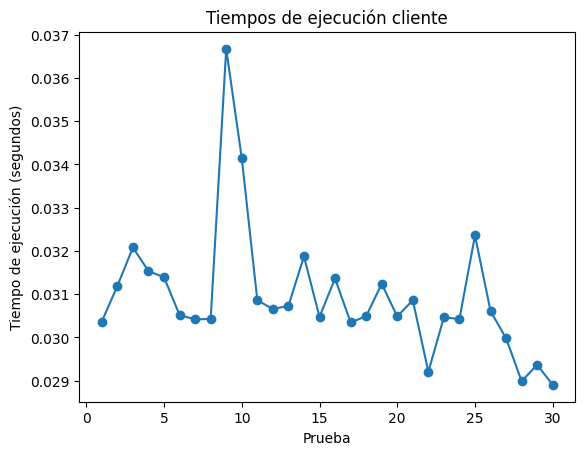

In [15]:
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de la imagen
tiempos_ejecucion = [0.030365,
0.031187,
0.032078,
0.031531,
0.031388,
0.030515,
0.030413,
0.030426,
0.036668,
0.034144,
0.030858,
0.030652,
0.030728,
0.031869,
0.030473,
0.031360,
0.030345,
0.030486,
0.031236,
0.030482,
0.030858,
0.029202,
0.030462,
0.030423,
0.032355,
0.030606,
0.029977,
0.028986,
0.029364,
0.028899
]

# Definir las etiquetas del eje X
pruebas = np.arange(1, 31)

# Crear la gráfica
plt.plot(pruebas, tiempos_ejecucion, marker='o')
plt.xlabel("Prueba")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempos de ejecución cliente")

# Mostrar la gráfica
plt.show()

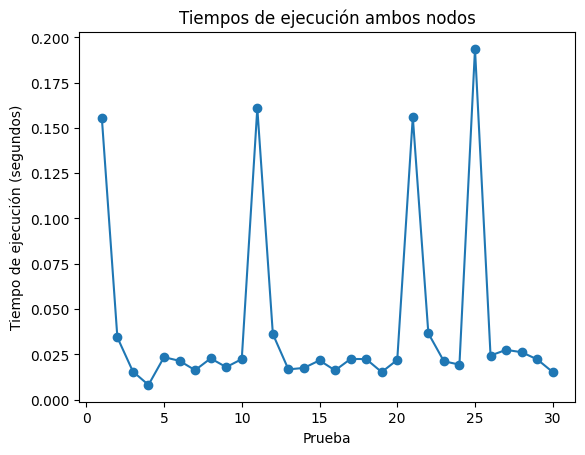

In [17]:
#nada q ver
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de la imagen
tiempos_ejecucion = [
    0.155605,
0.034379,
0.015542,
0.008154,
0.023481,
0.021437,
0.016278,
0.022808,
0.017977,
0.022399,
0.160905,
0.036244,
0.016732,
0.017532,
0.021704,
0.016161,
0.022498,
0.022418,
0.015241,
0.021961,
0.156047,
0.036633,
0.021220,
0.019358,
0.193587,
0.024374,
0.027497,
0.026214,
0.022268,
0.015245
]

# Definir las etiquetas del eje X
pruebas = np.arange(1, 31)

# Crear la gráfica
plt.plot(pruebas, tiempos_ejecucion, marker='o')
plt.xlabel("Prueba")
plt.ylabel("Tiempo de ejecución (segundos)")
plt.title("Tiempos de ejecución ambos nodos")

# Mostrar la gráfica
plt.show()

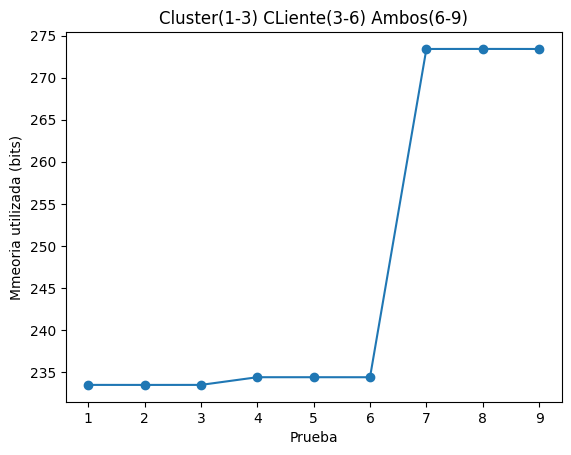

In [20]:
#nada q ver
# Importar las bibliotecas necesarias
import matplotlib.pyplot as plt
import numpy as np

# Extraer los datos de la imagen
tiempos_ejecucion = [233.453,233.450,233.453,234.367,234.367,234.364,273.420,273.426,273.420]

# Definir las etiquetas del eje X
pruebas = np.arange(1, 10)

# Crear la gráfica
plt.plot(pruebas, tiempos_ejecucion, marker='o')
plt.xlabel("Prueba")
plt.ylabel("Mmeoria utilizada (bits)")
plt.title("Cluster(1-3) CLiente(3-6) Ambos(6-9)")

# Mostrar la gráfica
plt.show()